In [1]:
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# File to Load (Remember to change these)
city_data_to_load = "data/city_data.csv"
ride_data_to_load = "data/ride_data.csv"

# Read the City and Ride Data
city_df = pd.read_csv(city_data_to_load)
ride_df = pd.read_csv(ride_data_to_load)
city_df.head()
# Combine the data into a single dataset
city_ride_df = pd.merge(city_df, ride_df, on="city", how="outer")
# Display the data table for preview
city_ride_df.head()

,city,driver_count,type,date,fare,ride_id
0,Richardfort,38,Urban,2018-02-24 08:40:38,13.93,5628545007794
1,Richardfort,38,Urban,2018-02-13 12:46:07,14.00,910050116494
2,Richardfort,38,Urban,2018-02-16 13:52:19,17.92,820639054416
3,Richardfort,38,Urban,2018-02-01 20:18:28,10.26,9554935945413
4,Richardfort,38,Urban,2018-04-17 02:26:37,23.00,720020655850


In [2]:
city_ride_data_df = pd.DataFrame(city_ride_df.groupby("city")['fare'].mean())
city_ride_data_df = city_ride_data_df.rename(columns={"fare": "Average_Fare"})
city_ride_data_df['Total_Rides'] = city_ride_df.groupby("city")['ride_id'].count()
city_ride_data_df['Total_Drivers'] = city_ride_df.groupby("city")['driver_count'].mean()
city_type_df = city_ride_df.groupby(["city", "type"]).mean().reset_index("type")
city_ride_data_df['City_Type'] = city_type_df['type']
city_ride_data_df.head()

,Average_Fare,Total_Rides,Total_Drivers,City_Type
city,,,,
Amandaburgh,24.641667,18,12,Urban
Barajasview,25.332273,22,26,Urban
Barronchester,36.422500,16,11,Suburban
Bethanyland,32.956111,18,22,Suburban
Bradshawfurt,40.064000,10,7,Rural


## Bubble Plot of Ride Sharing Data

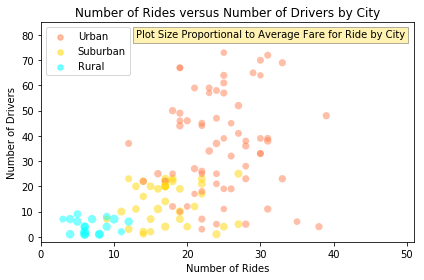

In [22]:
# Obtain the x and y coordinates for each of the three city types
fig, ax = plt.subplots()
x_axis = city_ride_data_df['Total_Rides']
y_axis = city_ride_data_df['Total_Drivers']
#rideSize = city_ride_data_df['Total_Drivers']
#y_axis = city_ride_data_df['Total_Drivers']
rideSize = city_ride_data_df['Average_Fare']*2
# Build the scatter plots for each city types
def chooseColor(x):
    if x == "Urban":
        return '#FF7F50'
    elif x == "Suburban":
        return "#FFD700"
    else:
        return "#00FFFF"

cityLabels = [cityType for cityType in city_ride_data_df['City_Type']]
colors = [chooseColor(x) for x in cityLabels]

plt.scatter(x_axis, y_axis, s=rideSize, c=colors, alpha=0.5, edgecolors='r', linewidths=0, label="__no_legend__")

# Incorporate the other graph properties
plt.xlabel("Number of Rides")
plt.ylabel("Number of Drivers")
plt.title("Number of Rides versus Number of Drivers by City")

# Create a legend
for cityType in ["Urban", "Suburban", "Rural"]:
    plt.scatter([], [], c=chooseColor(cityType), alpha=0.5, s=30,
                label=cityType)
plt.legend(scatterpoints=1, frameon=True, labelspacing=1, title='City Type')
plt.legend(loc='upper left')

# Incorporate a text label regarding circle size
ax.text(13, y_axis.max()+6, 'Plot Size Proportional to Average Fare for Ride by City', style='normal', color='#000000',
        bbox={'facecolor':'#FFD700', 'alpha':0.3, 'pad':3})
plt.ylim(y_axis.min()-3,y_axis.max()+12)
plt.xlim(x_axis.min()-3,x_axis.max()+12)
plt.tight_layout()
# Save Figure
plt.savefig('pyber_scat.pdf')

In [4]:
# Show plot
plt.show()

## Total Fares by City Type

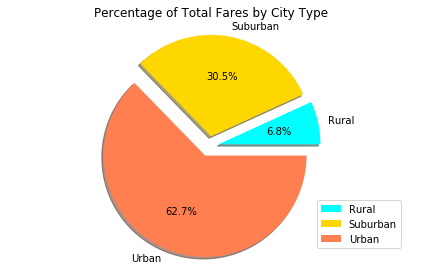

In [23]:
# Calculate Type Percents
city_fares_by_city_data_df = pd.DataFrame(city_ride_df.groupby("type")['fare'].sum())
city_fares_by_city_data_df = city_fares_by_city_data_df.rename(columns={"fare": "Total_Fare"})
city_fares_by_city_data_df = city_fares_by_city_data_df.reset_index()
city_fares_by_city_data_df.head()
# Build Pie Chart
explode = (0.1, 0.1, 0.1)
pieColor = [chooseColor(city) for city in  city_fares_by_city_data_df['type']]
plt.pie(city_fares_by_city_data_df['Total_Fare'], labels=city_fares_by_city_data_df['type'], colors=pieColor, 
        explode=explode, autopct="%1.1f%%", shadow=True, startangle=0)
plt.axis("equal")
plt.title("Percentage of Total Fares by City Type")
plt.legend(loc="best", bbox_to_anchor=(.75, 0.3))
plt.tight_layout()
# Save Figure
plt.savefig("pyber_pie_total_fares.pdf")

# Show Figure
plt.show()

## Total Rides by City Type

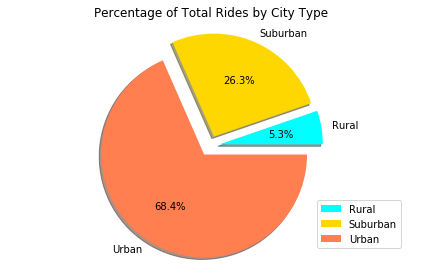

In [24]:
# Calculate Ride Percents
city_rides_by_city_data_df = pd.DataFrame(city_ride_df.groupby("type")['ride_id'].count())
city_rides_by_city_data_df = city_rides_by_city_data_df.rename(columns={"ride_id": "Total_Rides"})
city_rides_by_city_data_df = city_rides_by_city_data_df.reset_index()
explode = (0.1, 0.1, 0.1)
pieColor = [chooseColor(city) for city in  city_fares_by_city_data_df['type']]
# Build Pie Chart
plt.pie(city_rides_by_city_data_df['Total_Rides'], labels=city_rides_by_city_data_df['type'], colors=pieColor,
        explode=explode, autopct="%1.1f%%", shadow=True, startangle=0)
plt.title("Percentage of Total Rides by City Type")
plt.axis("equal")
plt.legend(loc="best", bbox_to_anchor=(.75, 0.3))
plt.tight_layout()
# Save Figure
plt.savefig("pyber_pie_total_rides.pdf")

In [25]:
# Show Figure
plt.show()

## Total Drivers by City Type

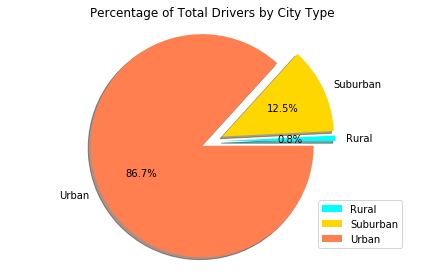

In [26]:
# Calculate Driver Percents
city_drivers_by_city_data_df = pd.DataFrame(city_ride_df.groupby("type")['driver_count'].sum())
city_drivers_by_city_data_df = city_drivers_by_city_data_df.rename(columns={"driver_count": "Total_Drivers"})
city_drivers_by_city_data_df = city_drivers_by_city_data_df.reset_index()
pieColor = [chooseColor(city) for city in  city_fares_by_city_data_df['type']]
explode = (0.1, 0.1, 0.1)
# Build Pie Charts
plt.pie(city_drivers_by_city_data_df['Total_Drivers'], labels=city_drivers_by_city_data_df['type'], colors=pieColor, 
        explode=explode, autopct="%1.1f%%", shadow=True, startangle=0)
plt.title("Percentage of Total Drivers by City Type")
plt.axis("equal")
plt.legend(loc="best", bbox_to_anchor=(.75, 0.3))
plt.tight_layout()
# Save Figure
plt.savefig("pyber_pie_total_drivers.pdf")

In [27]:
# Show Figure
plt.show()